In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings 
warnings.filterwarnings('ignore')

plt.rcParams['font.family'] = ['sans-serif']
plt.rcParams['font.sans-serif'] = ['SimHei']

# 数据分析背景

## 消费分期

基于场景的消费分期，资金是直接打给产品提供方，消费者是接触不到现金的，会排除大部分欺诈风险。其最大的风险是用户的还款能力，能不能持续把钱还上。消费分期公司一般为线上线下结合，需要销售人员寻找线下的消费场景。

由于精确了解用户借款所购买的商品和服务，并可根据这些商品和服务的特点（包括用户消费的迫切程度、商品和服务的使用周期等）实施更加有效的风控措施、追偿手段，用户的还款意愿和违约成本与其所购买的商品、服务紧密相连，因此其实际借款利率应与消费内容存在一定的关联关系。

现在市面上较多的分期有3c分期（手机、电动车）、汽车分期等。我们所知晓的有蚂蚁话呗、京东白条、捷信等。

## 现金贷

现金贷则是纯线上操作，在见不到收款方本人、不需知道真实消费意图是什么的情况下就会放款，而且款项会采取受托支付的方式打给收款方。因此，现金贷在风控上的要求更高，遇到的挑战和困难更多。不过相对于消费分期，现金贷规模可以做大，人力成本有高有低。

现在做现金贷的公司很多很多，如玖富、51信用卡、360借条、借呗、捷信等等

消费分期侧重于线下，现金贷类侧重于线上；从一定角度上来看，消费分期的用户可以转换为现金贷流量。

# 数据介绍

## applys 申请信息

In [2]:
data_applys_org = pd.read_csv(r'./data/applys.tsv', sep='\t')
data_applys_org.head()

,apply_id,customer_id,channel_id,goods_id,consume_goods_name,consume_goods_type,seller_id,seller_city,seller_risk_level,apply_amount,apply_time,apply_periods,recommend_code,clerk_id,clerk_submit_time,consume_goods_price,consume_goods_advance,consume_goods_remark,user_risk_level
0,228679091,528424289,56466223,28562248,苹果7plus128g金色（首付2700）,0,27053709,1465.0,0.0,4100,2017-11-22 00:00:00,15,0000,13654.0,NaN,NaN,NaN,NaN,NaN
1,229442713,529099188,1080747328,0,NaN,3,0,NaN,NaN,700,2017-10-01 00:00:14,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,229442737,529100126,1080747328,0,NaN,3,0,NaN,NaN,2000,2017-10-01 00:00:47,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,229442740,528963792,2114879934,0,NaN,3,0,NaN,NaN,2000,2017-10-01 00:00:48,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,229442745,529101303,1080747328,0,NaN,3,0,NaN,NaN,800,2017-10-01 00:00:57,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
data_applys_org.shape

(355247, 19)

In [4]:
data_applys_org.columns

Index(['apply_id', 'customer_id', 'channel_id', 'goods_id',
       'consume_goods_name', 'consume_goods_type', 'seller_id', 'seller_city',
       'seller_risk_level', 'apply_amount', 'apply_time', 'apply_periods',
       'recommend_code', 'clerk_id', 'clerk_submit_time',
       'consume_goods_price', 'consume_goods_advance', 'consume_goods_remark',
       'user_risk_level'],
      dtype='object')

applys.csv  申请信息

    `apply_id`                '申请Id',
    `customer_id`              '客户Id',
    `channel_id`              '渠道编号',
    `goods_id`                '商品Id',
    `consume_goods_name`         '商品名称',
    `consume_goods_type`         '商品类别',
    `seller_id`               '商铺id',
    `seller_level`             '商铺等级',
    `seller_city`              '商铺所在市',
    `seller_risk_level`          '商铺风险等级',
    `apply_amount`             '申请额度',
    `apply_periods`             '申请分期数',
    `recommend_code`            '推荐码',
    `clerk_id`                '办单员id',
    `clerk_submit_time`          '办单员提交时间',
    `apply_time` datetime        '申请时间',
    `consume_goods_price`        '商品金额',
    `consume_goods_advance`       '商品首付',
    `consume_goods_remark`        '商品描述',
    `user_risk_level`           '用户风险等级',

注；consume_goods_type 业务类型， 0: 消费贷， 1：现金贷  其他：小额贷

## users 用户信息

In [5]:
data_users_org = pd.read_csv('./data/users.tsv', sep='\t')
data_users_org.head()

,apply_id,customer_id,name,phone,grant_operator_phone,idcard,customer_type,is_real_name,month_income,loan_intent,...,locate_longitude,authorized_contacts,authorized_fund,authorized_jd,authorized_operator,authorized_qq,authorized_sms,authorized_social_security,authorized_taobao,authorized_xuexin
0,228679091,528424289,刘*,151****1853,151****1853,4*****1990****2238,2,0,0,NaN,...,0.000,1,0,0,1,0,1,0,0,0
1,229442713,529099188,莫*,153****4251,153****4251,4*****1995****5717,2,0,0,NaN,...,113.611,0,0,0,1,0,1,0,0,0
2,229442737,529100126,杨*,132****2874,132****2874,5*****1999****0915,2,0,0,NaN,...,104.220,0,0,0,1,0,1,0,0,0
3,229442740,528963792,徐*,158****4115,158****4115,5*****1994****8478,2,0,0,NaN,...,105.566,0,0,0,1,0,1,0,0,0
4,229442745,529101303,吴*,134****7272,134****7272,4*****1995****5619,2,0,0,NaN,...,114.384,0,0,1***,1,0,1,0,0,1***


In [6]:
data_users_org.shape

(364689, 28)

In [7]:
data_users_org.columns

Index(['apply_id', 'customer_id', 'name', 'phone', 'grant_operator_phone',
       'idcard', 'customer_type', 'is_real_name', 'month_income',
       'loan_intent', 'company_city', 'autograph_url', 'idcard_head_image_url',
       'idcard_tail_image_url', 'idcard_handheld_image_url', 'other_image_url',
       'job', 'locate_latitude', 'locate_longitude', 'authorized_contacts',
       'authorized_fund', 'authorized_jd', 'authorized_operator',
       'authorized_qq', 'authorized_sms', 'authorized_social_security',
       'authorized_taobao', 'authorized_xuexin'],
      dtype='object')

users.csv  用户信息


    `customer_id`   '用户ID',
    `apply_id`   '申请ID',
    `name`    '客户姓名',
    `phone`    '手机号',
    `grant_operator_phone`    '授权运营商手机号',
    `idcard`   '身份证号',
    `customer_type`   '客户类别',
    `is_real_name`  ,
    `month_income`   '月收入',
    `loan_intent`    '借款你用途',
    `company_city`    '公司所在市',
    `autograph_url`  ,
    `idcard_head_image_url`    '身份证正面照',
    `idcard_tail_image_url`    '身份证反面照',
    `idcard_handheld_image_url`    '手持身份证',
    `other_image_url` '其他照片',
    `job`    '职业',
    `locate_longitude`   '定位经度',
    `locate_latitude`   '定位纬度',
    `authorized_taobao`    '是否授权淘宝（0：未授权，其他值：授权的用户名）',
    `authorized_jd`    '是否授权京东（0：未授权，其他值：授权的用户名）',
    `authorized_operator`   '是否授权运营商（0：未授权， 1：授权）',
    `authorized_qq`   '是否授权运qq（0：未授权， 1：授权）',
    `authorized_contacts`   '是否授权通讯录（0：未授权， 1：授权）',
    `authorized_xuexin`    '是否授权学信（0：未授权， 其他值：授权的用户名）',
    `authorized_social_security`    '是否授权社保（0：未授权， 其他值：授权的用户名）',
    `authorized_sms`   '是否授权短信（0：未授权， 1：授权）',
    `authorized_fund`   '是否授权公积金（0：未授权，其他值：授权的用户名）'

customer_type字典
{
    0: '',
    1: '学生',
    2: '工薪',
    3: '自雇',
    4: '自由职业者'
}

## audits 审核信息

In [8]:
data_audits_org = pd.read_csv(r'./data/audits.tsv', sep='\t')
data_audits_org.head()

,apply_id,customer_id,audit_status,channel_push_status,insert_time,social_security,credit_report,operator,sms,memo,...,channel_auditor_memo,channel_auditor_start_time,channel_auditor_finish_time,clerk_update_msg,clerk_update_status,clerk_update_time,manager_id,manager_update_time,manager_status,manager_memo
0,229442713,529099188,1,0,2017-10-01 00:00:15,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,0,NaN
1,229442737,529100126,1,0,2017-10-01 00:00:47,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,0,NaN
2,229442740,528963792,7,0,2017-10-01 00:00:49,NaN,NaN,NaN,NaN,"{\cancel\"": {\""msg\"": \""\"", \""result\"": []}, \...",...,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,0,NaN
3,229442745,529101303,1,0,2017-10-01 00:00:58,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,0,NaN
4,229442754,529097569,1,0,2017-10-01 00:01:13,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,0,NaN


In [9]:
data_audits_org.columns

Index(['apply_id', 'customer_id', 'audit_status', 'channel_push_status',
       'insert_time', 'social_security', 'credit_report', 'operator', 'sms',
       'memo', 'approve_amount', 'approve_periods', 'auditor_id',
       'audit_start_time', 'audit_finish_time', 'decision', 'tele_auditor_id',
       'tele_audit_result', 'tele_decision', 'tele_memo', 'tele_start_date',
       'tele_finish_date', 'channel_auditor_id', 'channel_auditor_decision',
       'channel_auditor_memo', 'channel_auditor_start_time',
       'channel_auditor_finish_time', 'clerk_update_msg',
       'clerk_update_status', 'clerk_update_time', 'manager_id',
       'manager_update_time', 'manager_status', 'manager_memo'],
      dtype='object')

In [10]:
data_audits_org.shape

(364692, 34)

audits.csv  审核信息

    `apply_id`   '申请Id',
    `customer_id`   '用户id',
    `audit_status`   '审核状态',
    `insert_time`   '记录生成时间',
    `social_security`    '社保意见',
    `withdrawals`    '提现意见',
    `credit_report`    '征信意见',
    `operator`    '运营商意见',
    `credit_card_email`    '信用卡意见',
    `sms`    '短信意见',
    `memo` text  COMMENT '备注',
    `approve_amount`   '审批额度',
    `approve_periods`   '审批期数',
    `auditor_id`   '初审人编号',
    `audit_start_time`   '审核开始时间',
    `audit_finish_time`   '审核结束时间',
    `decision`    '初审结论',
    `tele_auditor_id`   '电核人编号',
    `tele_audit_result`   ,
    `tele_decision`    '电核结论',
    `tele_memo`  '电核备注',
    `tele_start_date`   '电核开始时间',
    `tele_finish_date`   '电核结束时间',
    `channel_auditor_id`   '渠道审核人编号',
    `channel_auditor_start_time`   '渠道审核开始时间',
    `channel_auditor_finish_time`   '渠道审核结束时间',
    `channel_auditor_decision`   '渠道人员操作状态描述，1 通过、2 拒绝、3 取消、4 驳回',
    `channel_auditor_memo`  '渠道操作备注',
    `clerk_update_status`   '办单员处理状态, 0 表示默认, 1表示拒绝, 2表示取消',
    `clerk_update_time`   '办单员操作更新时间',
    `clerk_update_msg`    '办单员处理状态说明',
    `manager_id`   '运营经理或小组长编号',
    `manager_name`    '运营、小组长姓名',
    `manager_update_time`   '运营操作时间',
    `manager_status`   '操作状态描述，1 通过、2 拒绝、3 取消、4 驳回',
    `manager_memo`  '运营操作备注',
    
    
    AUDIT_STATUS = {
    0: '待审核',
    1: '拒绝',  
    6: '拒绝',  # stage2拒绝
    7: '通过',  
    10: '取消',  
    13: '电核拒绝',  # stage3 拒绝
    14: '电核取消',  # stage3 取消
    15: '电核通过',  # stage3 通过
    32: '渠道担保通过'
}

## results 审核结果信息

In [11]:
data_results_org = pd.read_csv('./data/results.csv')
data_results_org.head()

,id,apply_id,final_status,update_time,result
0,71015409,229442656,2,2017-10-01 00:00:23,#初审拒绝
1,71015410,229442683,2,2017-10-01 00:01:45,#初审拒绝
2,71015411,229442688,2,2017-10-01 00:01:52,#初审拒绝
3,71015412,229442737,2,2017-10-01 00:02:57,#初审拒绝
4,71015413,229442713,2,2017-10-01 00:03:02,#初审拒绝


In [12]:
data_results_org.shape

(360796, 5)

In [13]:
data_results_org.columns

Index(['id', 'apply_id', 'final_status', 'update_time', 'result'], dtype='object')

results.csv  结果信息

    `apply_id`   '申请ID',
    `final_status`   '表示最终结果状态, 1 通过、2 拒绝、3 取消、4 驳回',
    `reason`   '抽取出来的原因字段'

## orders 订单信息

In [14]:
data_orders_org = pd.read_csv('./data/orders.csv')
data_orders_org.head()

,id,apply_id,createtime,DELIVERY_STATUS,STATUS,DELIVERY,QUOTA
0,28347580,29591144,2017-10-20 00:02:01,1,1,0,1472.0
1,28347581,29591147,2017-10-20 00:04:41,1,1,0,848.0
2,28347582,29591148,2017-10-20 00:04:43,1,5,0,720.0
3,28347583,29591149,2017-10-20 00:06:22,1,5,0,1170.0
4,28347584,29591153,2017-10-20 00:14:33,1,5,0,990.0


In [15]:
data_orders_org.columns

Index(['id', 'apply_id', 'createtime', 'DELIVERY_STATUS', 'STATUS', 'DELIVERY',
       'QUOTA'],
      dtype='object')

In [16]:
data_orders_org.shape

(55231, 7)

order.csv  订单信息

    `apply_id`  '申请ID',
    `customer_id` '用户编号',
    `createtime`  '创建时间',
    `DELIVERY_STATUS`  '发货状态：默认1，1未发货 2已发货3退货',
    `STATUS`  '订单状态:默认1 ，1已支付 2有预付款 4取消 5完成',
    `DELIVERY`  '发货',
    `QUOTA`  '订单本金'

## order_details 账单分期信息

In [17]:
data_order_details_org = pd.read_csv('./data/order_details.csv')
data_order_details_org.head()

,order_id,repayment,stage,STATUS,IS_OVERDUE,OVER_DAY,REPAYMENT_TIME,PAYMENT_DATE,CREATE_TIME
0,28347580,1-1,1600.0,2,1,164.0,2017-11-09 00:00:00,NaN,2017-11-11 23:12:06
1,28347581,1-1,1000.0,2,1,177.0,2017-10-27 00:00:00,NaN,2017-11-11 23:12:06
2,28347582,1-1,900.0,1,1,1.0,2017-11-04 00:00:00,2017-11-05 22:37:24,2017-11-11 23:12:06
3,28347583,1-1,1300.0,1,1,3.0,2017-11-09 00:00:00,2017-11-12 13:12:50,2017-11-11 23:12:06
4,28347584,1-1,1100.0,1,1,3.0,2017-11-09 00:00:00,2017-11-12 17:28:39,2017-11-11 23:12:06


In [18]:
data_order_details_org.columns

Index(['order_id', 'repayment', 'stage', 'STATUS', 'IS_OVERDUE', 'OVER_DAY',
       'REPAYMENT_TIME', 'PAYMENT_DATE', 'CREATE_TIME'],
      dtype='object')

In [19]:
data_order_details_org.shape

(205211, 9)

order_details.csv  账单分期信息

    `order_id`  '订单ID',
    `stage`,`status`  '应还本金',
    `IS_OVERDUE`   '是否逾期',
    `OVER_DAY`   '逾期天数',
    `REPAYMENT_TIME`   '应还款时间',
    `PAYMENT_DATE`   '实还款日期'

# 分析目标

## 了解业务发展情况

（1）有哪些业务，不同业务的情况下的业务量， 如按照月份画出变化图。

（2）办理业务的人群分布（年龄，性别，职业等）

（3）对于消费贷，分析各个不同渠道的单量贡献。

## 业务审核情况

（1）计算不同业务的平均时效（注意对于某单的操作如果大于2h， 7600s处理）

（2）计算不同业务通过率，取消率， 拒绝率

（3）对于消费贷，查看不同取消率的占的比重。


## 贷后情况

（1）订单的逾期情况，逾期金额，逾期人数，逾期率（金额和人数）等


## 业务趋势

结合上述了解的情况，请制定下一周期（接下来1个月）时间段内目标，有说明。

- 单量, 放款量

- 时效: 审核时间， 取消率

- 逾期率


## 数据其它维度的挖掘

- 客户维度


- 时间维度


## 输出分析报告

分析报告

决策建议

数据支持

# 数据预处理

## data_applys_org

In [20]:
data_applys_org.head()

,apply_id,customer_id,channel_id,goods_id,consume_goods_name,consume_goods_type,seller_id,seller_city,seller_risk_level,apply_amount,apply_time,apply_periods,recommend_code,clerk_id,clerk_submit_time,consume_goods_price,consume_goods_advance,consume_goods_remark,user_risk_level
0,228679091,528424289,56466223,28562248,苹果7plus128g金色（首付2700）,0,27053709,1465.0,0.0,4100,2017-11-22 00:00:00,15,0000,13654.0,NaN,NaN,NaN,NaN,NaN
1,229442713,529099188,1080747328,0,NaN,3,0,NaN,NaN,700,2017-10-01 00:00:14,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,229442737,529100126,1080747328,0,NaN,3,0,NaN,NaN,2000,2017-10-01 00:00:47,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,229442740,528963792,2114879934,0,NaN,3,0,NaN,NaN,2000,2017-10-01 00:00:48,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,229442745,529101303,1080747328,0,NaN,3,0,NaN,NaN,800,2017-10-01 00:00:57,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
data_applys_org.isnull().all()

apply_id                 False
customer_id              False
channel_id               False
goods_id                 False
consume_goods_name       False
consume_goods_type       False
seller_id                False
seller_city              False
seller_risk_level        False
apply_amount             False
apply_time               False
apply_periods            False
recommend_code           False
clerk_id                 False
clerk_submit_time         True
consume_goods_price      False
consume_goods_advance    False
consume_goods_remark     False
user_risk_level          False
dtype: bool

## data_users_org

In [22]:
data_users_org.head()

,apply_id,customer_id,name,phone,grant_operator_phone,idcard,customer_type,is_real_name,month_income,loan_intent,...,locate_longitude,authorized_contacts,authorized_fund,authorized_jd,authorized_operator,authorized_qq,authorized_sms,authorized_social_security,authorized_taobao,authorized_xuexin
0,228679091,528424289,刘*,151****1853,151****1853,4*****1990****2238,2,0,0,NaN,...,0.000,1,0,0,1,0,1,0,0,0
1,229442713,529099188,莫*,153****4251,153****4251,4*****1995****5717,2,0,0,NaN,...,113.611,0,0,0,1,0,1,0,0,0
2,229442737,529100126,杨*,132****2874,132****2874,5*****1999****0915,2,0,0,NaN,...,104.220,0,0,0,1,0,1,0,0,0
3,229442740,528963792,徐*,158****4115,158****4115,5*****1994****8478,2,0,0,NaN,...,105.566,0,0,0,1,0,1,0,0,0
4,229442745,529101303,吴*,134****7272,134****7272,4*****1995****5619,2,0,0,NaN,...,114.384,0,0,1***,1,0,1,0,0,1***


In [23]:
data_users_org.isnull().all()

apply_id                      False
customer_id                   False
name                          False
phone                         False
grant_operator_phone          False
idcard                        False
customer_type                 False
is_real_name                  False
month_income                  False
loan_intent                   False
company_city                  False
autograph_url                 False
idcard_head_image_url         False
idcard_tail_image_url         False
idcard_handheld_image_url     False
other_image_url               False
job                           False
locate_latitude               False
locate_longitude              False
authorized_contacts           False
authorized_fund               False
authorized_jd                 False
authorized_operator           False
authorized_qq                 False
authorized_sms                False
authorized_social_security    False
authorized_taobao             False
authorized_xuexin           

## data_audits_org

In [24]:
data_audits_org.head()

,apply_id,customer_id,audit_status,channel_push_status,insert_time,social_security,credit_report,operator,sms,memo,...,channel_auditor_memo,channel_auditor_start_time,channel_auditor_finish_time,clerk_update_msg,clerk_update_status,clerk_update_time,manager_id,manager_update_time,manager_status,manager_memo
0,229442713,529099188,1,0,2017-10-01 00:00:15,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,0,NaN
1,229442737,529100126,1,0,2017-10-01 00:00:47,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,0,NaN
2,229442740,528963792,7,0,2017-10-01 00:00:49,NaN,NaN,NaN,NaN,"{\cancel\"": {\""msg\"": \""\"", \""result\"": []}, \...",...,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,0,NaN
3,229442745,529101303,1,0,2017-10-01 00:00:58,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,0,NaN
4,229442754,529097569,1,0,2017-10-01 00:01:13,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,0,NaN


In [25]:
data_audits_org.isnull().all()

apply_id                       False
customer_id                    False
audit_status                   False
channel_push_status            False
insert_time                    False
social_security                 True
credit_report                   True
operator                        True
sms                             True
memo                           False
approve_amount                 False
approve_periods                 True
auditor_id                     False
audit_start_time               False
audit_finish_time              False
decision                       False
tele_auditor_id                False
tele_audit_result               True
tele_decision                  False
tele_memo                      False
tele_start_date                False
tele_finish_date               False
channel_auditor_id             False
channel_auditor_decision       False
channel_auditor_memo           False
channel_auditor_start_time     False
channel_auditor_finish_time     True
c

## data_results_org

In [26]:
data_results_org.head()

,id,apply_id,final_status,update_time,result
0,71015409,229442656,2,2017-10-01 00:00:23,#初审拒绝
1,71015410,229442683,2,2017-10-01 00:01:45,#初审拒绝
2,71015411,229442688,2,2017-10-01 00:01:52,#初审拒绝
3,71015412,229442737,2,2017-10-01 00:02:57,#初审拒绝
4,71015413,229442713,2,2017-10-01 00:03:02,#初审拒绝


In [27]:
data_results_org.isnull().all()

id              False
apply_id        False
final_status    False
update_time     False
result          False
dtype: bool

## data_orders_org

In [28]:
data_orders_org.head()

,id,apply_id,createtime,DELIVERY_STATUS,STATUS,DELIVERY,QUOTA
0,28347580,29591144,2017-10-20 00:02:01,1,1,0,1472.0
1,28347581,29591147,2017-10-20 00:04:41,1,1,0,848.0
2,28347582,29591148,2017-10-20 00:04:43,1,5,0,720.0
3,28347583,29591149,2017-10-20 00:06:22,1,5,0,1170.0
4,28347584,29591153,2017-10-20 00:14:33,1,5,0,990.0


In [29]:
data_orders_org.isnull().all()

id                 False
apply_id           False
createtime         False
DELIVERY_STATUS    False
STATUS             False
DELIVERY           False
QUOTA              False
dtype: bool

## data_order_details_org

In [30]:
data_order_details_org.head()

,order_id,repayment,stage,STATUS,IS_OVERDUE,OVER_DAY,REPAYMENT_TIME,PAYMENT_DATE,CREATE_TIME
0,28347580,1-1,1600.0,2,1,164.0,2017-11-09 00:00:00,NaN,2017-11-11 23:12:06
1,28347581,1-1,1000.0,2,1,177.0,2017-10-27 00:00:00,NaN,2017-11-11 23:12:06
2,28347582,1-1,900.0,1,1,1.0,2017-11-04 00:00:00,2017-11-05 22:37:24,2017-11-11 23:12:06
3,28347583,1-1,1300.0,1,1,3.0,2017-11-09 00:00:00,2017-11-12 13:12:50,2017-11-11 23:12:06
4,28347584,1-1,1100.0,1,1,3.0,2017-11-09 00:00:00,2017-11-12 17:28:39,2017-11-11 23:12:06


In [31]:
data_order_details_org.isnull().all()

order_id          False
repayment         False
stage             False
STATUS            False
IS_OVERDUE        False
OVER_DAY          False
REPAYMENT_TIME    False
PAYMENT_DATE      False
CREATE_TIME       False
dtype: bool

# 业务数据分析

## 业务发展情况

### 申请业务总量及所占比例

In [32]:
# 有哪些业务
data_applys_org['consume_goods_type'].unique()

array([0, 3, 4, 1], dtype=int64)

In [33]:
data_buiness_group = data_applys_org['consume_goods_type'].replace(4, 3).value_counts()
data_buiness_group

3    142098
0    135139
1     78010
Name: consume_goods_type, dtype: int64

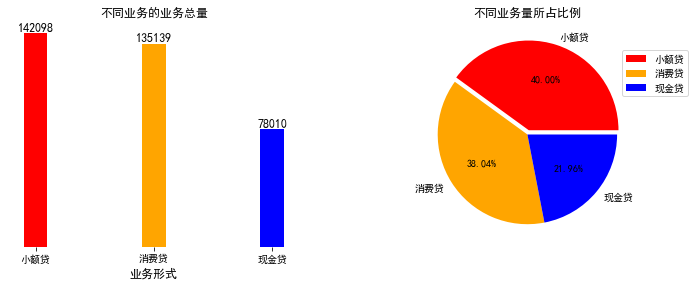

In [34]:
# 业务量
x_name = np.array(['小额贷', '消费贷', '现金贷'])
y_data = data_buiness_group.values

plt.figure(1, figsize=(12,6))
ax1 = plt.subplot(1,2,1)
ax2 = plt.subplot(1,2,2)

plt.sca(ax1)
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.spines['bottom'].set_visible(False)
ax1.spines['left'].set_visible(False)


plt.bar(x_name, y_data, color=['red', 'orange', 'blue'], width=0.2)

for x, y in zip(np.arange(len(x_name)), y_data):
    plt.text(x, y, y, ha='center', va='bottom', fontsize=12)

    
plt.title('不同业务的业务总量', fontsize=12)
plt.xlabel('业务形式', fontsize=12) 
plt.yticks([])
###################################绘制子2图
plt.sca(ax2)
# 业务占比
explode = (0.05, 0, 0)
plt.pie(y_data, explode=explode, labels=x_name, colors=['red', 'orange', 'blue'], autopct='%1.2f%%', shadow=False, startangle = 0)

plt.legend(loc='String or Number', bbox_to_anchor=(0.9, 0.9))
plt.title('不同业务量所占比例', fontsize=12)
plt.tight_layout(8)
plt.savefig('./1.jpg')
plt.show()

### 按月统计申请业务量，分析变化规律

In [35]:
# 切割取出月份
def get_month(x):
    return x[5:7]

In [36]:
data_applys_month = data_applys_org['apply_time'].apply(get_month)
data_applys_month.value_counts()

10    143323
11    127346
12     84578
Name: apply_time, dtype: int64

In [37]:
data_applys_org['month'] = data_applys_month

In [38]:
data_applys_type_0 = data_applys_org[data_applys_org['consume_goods_type'] == 0]
type0 = data_applys_type_0.groupby('month')
type0.size()

month
10    55450
11    42671
12    37018
dtype: int64

In [39]:
data_applys_type_1 = data_applys_org[data_applys_org['consume_goods_type'] == 1]
type1 = data_applys_type_1.groupby('month')
type1.size()

month
10    26537
11    29417
12    22056
dtype: int64

In [40]:
data_applys_type_34 = data_applys_org[(data_applys_org['consume_goods_type'] == 3) | (data_applys_org['consume_goods_type'] == 4)]
type34 = data_applys_type_34.groupby('month')
type34.size()

month
10    61336
11    55258
12    25504
dtype: int64

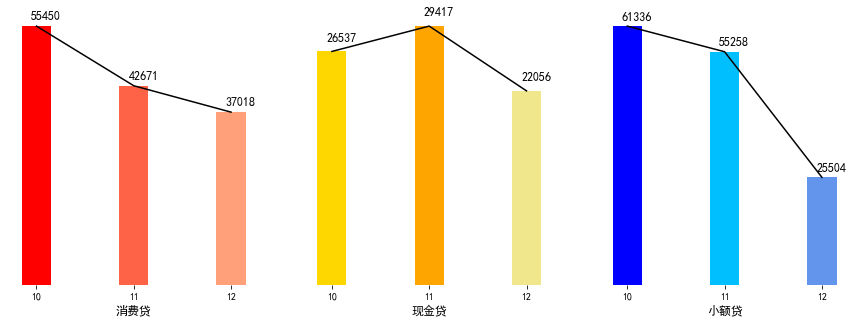

In [81]:
# 按月份作图

plt.figure(1, figsize=(15,5))
ax1 = plt.subplot(1,3,1)
ax2 = plt.subplot(1,3,2)
ax3 = plt.subplot(1,3,3)


###########################消费贷#############################
plt.sca(ax1)
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.spines['bottom'].set_visible(False)
ax1.spines['left'].set_visible(False)

plt.bar(type0.size().index, type0.size().values, color=['red', 'tomato', 'lightsalmon'], width=0.3,)
plt.yticks([])
for x, y in zip(np.arange(len(type0.size())), type0.size().values):
    plt.text(x+0.1, y+1000, y, ha='center', va='bottom', fontsize=12)
    
plt.plot(type0.size().index, type0.size().values, 'black')
plt.xlabel('消费贷', fontsize=12) 




############################现金贷##############################
plt.sca(ax2)
ax2.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax2.spines['bottom'].set_visible(False)
ax2.spines['left'].set_visible(False)

plt.bar(type1.size().index, type1.size().values, color=['gold', 'orange', 'khaki'], width=0.3,)
plt.yticks([])

for x, y in zip(np.arange(len(type1.size())), type1.size().values):
    plt.text(x+0.1, y+1000, y, ha='center', va='bottom', fontsize=12)
    
plt.plot(type1.size().index, type1.size().values, 'black')
plt.xlabel('现金贷', fontsize=12) 





########################小额贷##########################
plt.sca(ax3)
ax3.spines['right'].set_visible(False)
ax3.spines['top'].set_visible(False)
ax3.spines['bottom'].set_visible(False)
ax3.spines['left'].set_visible(False)

plt.bar(type34.size().index, type34.size().values, color=['blue', 'deepskyblue', 'cornflowerblue'], width=0.3,)
plt.yticks([])

for x, y in zip(np.arange(len(type34.size())), type34.size().values):
    plt.text(x+0.1, y+1000, y, ha='center', va='bottom', fontsize=12)
    
plt.plot(type34.size().index, type34.size().values, 'black')
plt.xlabel('小额贷', fontsize=12) 

plt.savefig('./test2.jpg')
plt.show()

## 人群分布

In [42]:
# 数据检查
data_users_org['idcard'].isnull().value_counts()

False    364689
Name: idcard, dtype: int64

In [43]:
data_users_org.head()

,apply_id,customer_id,name,phone,grant_operator_phone,idcard,customer_type,is_real_name,month_income,loan_intent,...,locate_longitude,authorized_contacts,authorized_fund,authorized_jd,authorized_operator,authorized_qq,authorized_sms,authorized_social_security,authorized_taobao,authorized_xuexin
0,228679091,528424289,刘*,151****1853,151****1853,4*****1990****2238,2,0,0,NaN,...,0.000,1,0,0,1,0,1,0,0,0
1,229442713,529099188,莫*,153****4251,153****4251,4*****1995****5717,2,0,0,NaN,...,113.611,0,0,0,1,0,1,0,0,0
2,229442737,529100126,杨*,132****2874,132****2874,5*****1999****0915,2,0,0,NaN,...,104.220,0,0,0,1,0,1,0,0,0
3,229442740,528963792,徐*,158****4115,158****4115,5*****1994****8478,2,0,0,NaN,...,105.566,0,0,0,1,0,1,0,0,0
4,229442745,529101303,吴*,134****7272,134****7272,4*****1995****5619,2,0,0,NaN,...,114.384,0,0,1***,1,0,1,0,0,1***


In [44]:
data_users_org.columns

Index(['apply_id', 'customer_id', 'name', 'phone', 'grant_operator_phone',
       'idcard', 'customer_type', 'is_real_name', 'month_income',
       'loan_intent', 'company_city', 'autograph_url', 'idcard_head_image_url',
       'idcard_tail_image_url', 'idcard_handheld_image_url', 'other_image_url',
       'job', 'locate_latitude', 'locate_longitude', 'authorized_contacts',
       'authorized_fund', 'authorized_jd', 'authorized_operator',
       'authorized_qq', 'authorized_sms', 'authorized_social_security',
       'authorized_taobao', 'authorized_xuexin'],
      dtype='object')

### 年龄分布

In [45]:
# 根据身份证获取年龄
def get_age(idcard):
    year = idcard[6:10]
    if '*' in year:
        age = np.random.choice(range(18, 100), 1)[0]
    else:
        age = 2019 - int(year)
        if age not in np.arange(0, 101):
            age = np.random.choice(range(18, 100), 1)[0]
    return age

In [46]:
user_ages = data_users_org['idcard'].map(get_age)
user_ages.value_counts().index

Int64Index([29, 24, 27, 25, 23, 26, 30, 28, 22, 21, 31, 32, 33, 20, 34, 35, 37,
            36, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53,
            54, 55, 56, 57, 19, 58, 18, 59, 60, 61, 62, 66, 67, 63, 64, 77, 87,
            94, 95, 65, 79, 82, 96],
           dtype='int64')

In [47]:
# 对年龄进行分箱操作
bins = [0, 20, 25, 30, 35, 40, 50, 100]
user_bins = pd.cut(user_ages, bins)
user_ages_bins = user_bins.groupby(user_bins.values).size()
user_ages_bins

(0, 20]       11728
(20, 25]     104337
(25, 30]     111784
(30, 35]      65854
(35, 40]      33948
(40, 50]      31834
(50, 100]      5204
Name: idcard, dtype: int64

In [48]:
age_lables = [str(i) for i in user_ages_bins.index]
age_lables

['(0, 20]',
 '(20, 25]',
 '(25, 30]',
 '(30, 35]',
 '(35, 40]',
 '(40, 50]',
 '(50, 100]']

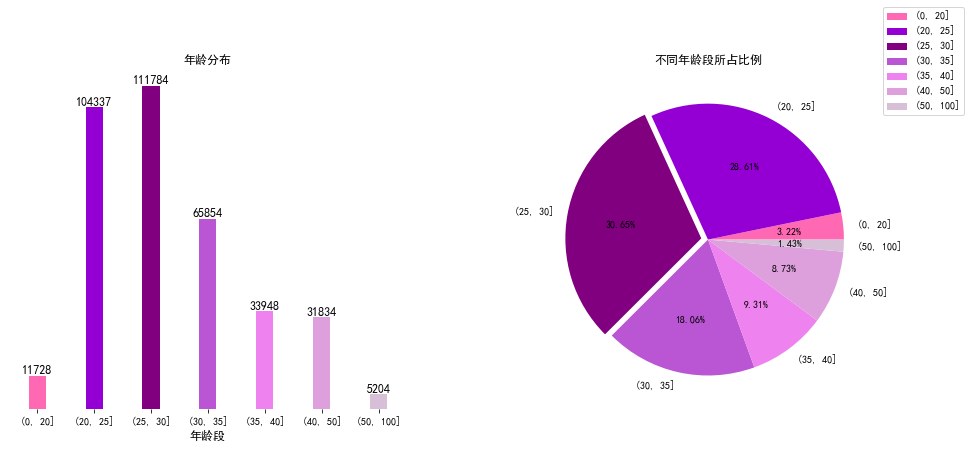

In [82]:
plt.figure(1, figsize=(15,8))
ax1 = plt.subplot(1,2,1)
ax2 = plt.subplot(1,2,2)

plt.sca(ax1)
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.spines['bottom'].set_visible(False)
ax1.spines['left'].set_visible(False)


plt.bar(age_lables, height=user_ages_bins.values, 
        color = ['hotpink', 'darkviolet', 'purple', 'mediumorchid', 'violet', 'plum', 'thistle'], width=0.3)

for x, y in zip(np.arange(len(age_lables)), user_ages_bins.values):
    plt.text(x, y, y, ha='center', va='bottom', fontsize=12)

    
plt.title('年龄分布', fontsize=12)
plt.xlabel('年龄段', fontsize=12) 
plt.yticks([])
###################################绘制子2图
plt.sca(ax2)
# 业务占比
explode = (0, 0, 0.05, 0, 0, 0, 0)
plt.pie(user_ages_bins.values, explode=explode, labels=age_lables, 
        colors=['hotpink', 'darkviolet', 'purple', 'mediumorchid', 'violet', 'plum', 'thistle'], 
        autopct='%1.2f%%', shadow=False, startangle = 0)

plt.legend(loc='String or Number', bbox_to_anchor=(1, 1.2))
plt.title('不同年龄段所占比例', fontsize=12)
plt.tight_layout(8)

plt.savefig('./test3.jpg')

plt.show()

### 性别

In [50]:
# 根据身份证获取性别
def get_sex(idcard):
    sex = ''
    if '*' in idcard[-1]:
        return 'female'
    elif idcard[-1] == 'X'or idcard[-1] == 'x':
        sex = 'female'
    elif int(idcard[-1]) % 2 == 0:
        sex = 'female'
    else:
        sex = 'male'
    return sex

In [51]:
user_sex = data_users_org['idcard'].apply(get_sex).value_counts()
user_sex

female    196239
male      168450
Name: idcard, dtype: int64

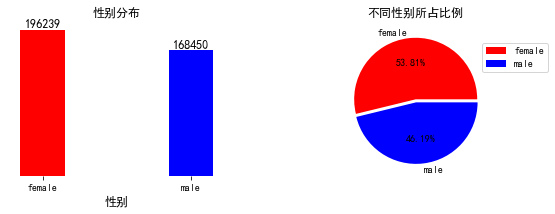

In [83]:
plt.figure(1, figsize=(10,5))
ax1 = plt.subplot(1,2,1)
ax2 = plt.subplot(1,2,2)

plt.sca(ax1)
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.spines['bottom'].set_visible(False)
ax1.spines['left'].set_visible(False)

plt.bar(user_sex.index, user_sex.values, color=['red', 'blue'], width=0.3)

for x, y in zip(np.arange(len(user_sex.index)), user_sex.values):
    plt.text(x, y, y, ha='center', va='bottom', fontsize=12)

# ax1.set_xticklabels(user_sex.index, rotation= 0)
plt.title('性别分布', fontsize=12)
plt.xlabel('性别', fontsize=12) 
plt.yticks([])


plt.sca(ax2)
ax2.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax2.spines['bottom'].set_visible(False)
ax2.spines['left'].set_visible(False)
explode = (0, 0.05)
plt.pie(user_sex.values, explode=explode, labels=user_sex.index, 
        colors=['red', 'blue'], 
        autopct='%1.2f%%', shadow=False, startangle = 0)

plt.legend(loc='String or Number', bbox_to_anchor=(0.9, 0.9))
plt.title('不同性别所占比例', fontsize=12)
plt.tight_layout(8)

plt.savefig('./test4.jpg')
plt.show()

### 职业

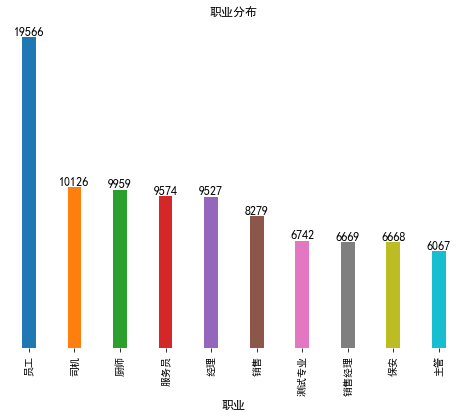

In [91]:
data_users_pro = data_users_org['job'].value_counts()[:10]
plt.figure(1, figsize=(8,6))
ax1 = plt.subplot(1,1,1)

plt.sca(ax1)
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.spines['bottom'].set_visible(False)
ax1.spines['left'].set_visible(False)


data_users_pro.plot(kind='bar', width=0.3)

for x, y in zip(np.arange(len(data_users_pro)), data_users_pro.values):
    plt.text(x, y, y, ha='center', va='bottom', fontsize=12)

    
plt.title('职业分布', fontsize=12)
plt.xlabel('职业', fontsize=12) 
plt.yticks([])

plt.savefig('./test5.jpg')

plt.show()

## 渠道分析

In [54]:
data_applys_org[data_applys_org['consume_goods_type'] == 0]['channel_id'].value_counts()[:10]

441317571     38271
1172475075    26468
169703210     23191
419544156      9148
1996335847     4396
683465192      4043
56466223       2573
1663210481     2363
1227060663     2182
554739494      2008
Name: channel_id, dtype: int64

In [55]:
data_applys_org[data_applys_org['consume_goods_type'] == 1]['channel_id'].value_counts()

1080747328    78010
Name: channel_id, dtype: int64

In [56]:
data_applys_org[(data_applys_org['consume_goods_type'] == 3) | (data_applys_org['consume_goods_type'] == 4)]['channel_id'].value_counts()

2114879934    76500
1080747328    64596
32255075       1002
Name: channel_id, dtype: int64

# 审核分析

##  不同业务的时效分析

In [57]:
data_applys_audits=pd.merge(data_applys_org[['apply_id','apply_time','consume_goods_type']].dropna(),
                            data_audits_org[['apply_id','clerk_update_time']].dropna(),on='apply_id',how='inner')

In [58]:
data_applys_audits.head()

,apply_id,apply_time,consume_goods_type,clerk_update_time
0,229447342,2017-10-01 08:44:50,0,2017-10-01 09:00:21
1,229448041,2017-10-01 09:22:55,0,2017-10-01 09:28:39
2,229448148,2017-10-01 09:30:10,0,2017-10-01 09:40:32
3,229448691,2017-10-01 10:02:02,0,2017-10-01 10:12:54
4,229448769,2017-10-01 10:06:54,0,2017-10-01 10:17:00


In [59]:
data_applys_audits['consume_goods_type'].value_counts()

0    11676
Name: consume_goods_type, dtype: int64

In [60]:
def change_time(x):
    return pd.to_datetime(x)

In [61]:
apply_time = data_applys_audits['clerk_update_time'].apply(change_time)
update_time = data_applys_audits['apply_time'].apply(change_time)
time_diff= apply_time - update_time
time_diff.head()

0   00:15:31
1   00:05:44
2   00:10:22
3   00:10:52
4   00:10:06
dtype: timedelta64[ns]

In [62]:
def change_seconds(x):
    return x.total_seconds()

In [63]:
data_applys_audits['time_diff']=time_diff.apply(change_seconds)
data_applys_audits.head(5)

,apply_id,apply_time,consume_goods_type,clerk_update_time,time_diff
0,229447342,2017-10-01 08:44:50,0,2017-10-01 09:00:21,931.0
1,229448041,2017-10-01 09:22:55,0,2017-10-01 09:28:39,344.0
2,229448148,2017-10-01 09:30:10,0,2017-10-01 09:40:32,622.0
3,229448691,2017-10-01 10:02:02,0,2017-10-01 10:12:54,652.0
4,229448769,2017-10-01 10:06:54,0,2017-10-01 10:17:00,606.0


In [64]:
data_applys_audits.shape

(11676, 5)

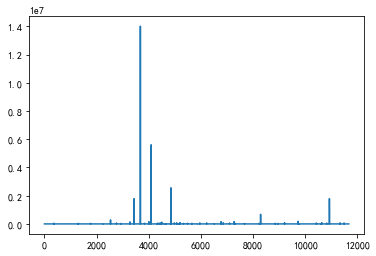

In [65]:
plt.plot(data_applys_audits['time_diff']) 
plt.show()

In [66]:
data_applys_audits['time_diff'].describe()

count    1.167600e+04
mean     3.038147e+03
std      1.437477e+05
min      5.000000e+00
25%      1.170000e+02
50%      4.550000e+02
75%      6.960000e+02
max      1.400585e+07
Name: time_diff, dtype: float64

In [67]:
## 异常值的衡量



In [68]:
## 异常数据筛查



## 不同业务的通过率、取消率、拒绝率

In [69]:
data_channel=pd.merge(data_applys_org[['apply_id','consume_goods_type']],
                      data_audits_org[['apply_id','channel_auditor_decision']],on='apply_id',how='inner')
data_channel.head(5)

,apply_id,consume_goods_type,channel_auditor_decision
0,229442713,3,0
1,229442737,3,0
2,229442740,3,0
3,229442745,3,0
4,229442754,3,0


In [70]:
# 0 默认状态、1 通过、2 拒绝、3 取消、4 驳回
data_channel.groupby(['consume_goods_type', 'channel_auditor_decision']).size()

consume_goods_type  channel_auditor_decision
0                   0                           122931
                    1                              210
                    2                             1124
                    3                            10870
1                   0                            78010
3                   0                           141084
4                   0                             1014
dtype: int64

In [71]:
# 消费贷取消比例
data_channel_0 = data_channel[(data_channel['consume_goods_type'] == 0) & (data_channel['channel_auditor_decision'] != 0)]
data_percent_channel = data_channel_0['channel_auditor_decision'].value_counts()
data_percent_channel

3    10870
2     1124
1      210
Name: channel_auditor_decision, dtype: int64

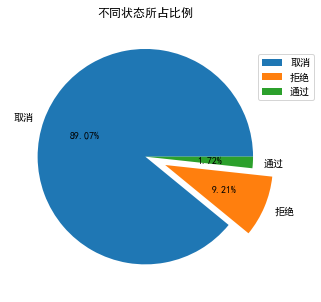

In [92]:
plt.figsize = (10, 10)
explode = (0, 0.2, 0)
plt.pie(data_percent_channel, explode=explode, labels=['取消', '拒绝', '通过'], 
        autopct='%1.2f%%', shadow=False, startangle = 0)

plt.legend(loc='String or Number', bbox_to_anchor=(0.9, 0.9))
plt.title('不同状态所占比例', fontsize=12)
plt.tight_layout(0)

plt.savefig('./test6.jpg')
plt.show()

# 贷后情况分析

In [73]:
data_order_details_org.head()

,order_id,repayment,stage,STATUS,IS_OVERDUE,OVER_DAY,REPAYMENT_TIME,PAYMENT_DATE,CREATE_TIME
0,28347580,1-1,1600.0,2,1,164.0,2017-11-09 00:00:00,NaN,2017-11-11 23:12:06
1,28347581,1-1,1000.0,2,1,177.0,2017-10-27 00:00:00,NaN,2017-11-11 23:12:06
2,28347582,1-1,900.0,1,1,1.0,2017-11-04 00:00:00,2017-11-05 22:37:24,2017-11-11 23:12:06
3,28347583,1-1,1300.0,1,1,3.0,2017-11-09 00:00:00,2017-11-12 13:12:50,2017-11-11 23:12:06
4,28347584,1-1,1100.0,1,1,3.0,2017-11-09 00:00:00,2017-11-12 17:28:39,2017-11-11 23:12:06


In [74]:
data_orders_org.head()

,id,apply_id,createtime,DELIVERY_STATUS,STATUS,DELIVERY,QUOTA
0,28347580,29591144,2017-10-20 00:02:01,1,1,0,1472.0
1,28347581,29591147,2017-10-20 00:04:41,1,1,0,848.0
2,28347582,29591148,2017-10-20 00:04:43,1,5,0,720.0
3,28347583,29591149,2017-10-20 00:06:22,1,5,0,1170.0
4,28347584,29591153,2017-10-20 00:14:33,1,5,0,990.0


In [75]:
data_order_details_org[data_order_details_org['repayment']=='1-1'].shape[0]

39683

In [76]:
data_order_details_org[(data_order_details_org['STATUS']==0)|(data_order_details_org['STATUS']==2)].shape[0]

92227

In [77]:
data_order_details_org[(data_order_details_org['STATUS']==0)&(data_order_details_org['IS_OVERDUE']==1)]

,order_id,repayment,stage,STATUS,IS_OVERDUE,OVER_DAY,REPAYMENT_TIME,PAYMENT_DATE,CREATE_TIME


In [78]:
# 逾期金额
data_order_details_org[data_order_details_org['IS_OVERDUE']==1]['stage'].sum()

23553746.47

In [79]:
#逾期人数
data_order_details_org['IS_OVERDUE'].value_counts()

0    168507
1     36704
Name: IS_OVERDUE, dtype: int64

In [80]:
#逾期率
total=data_order_details_org.shape[0]
overdue=data_order_details_org[data_order_details_org['IS_OVERDUE']==1].shape[0]
overdue/total

0.178859807710113

# 业务趋势

## 结合上述分析，制定下周（月）的目标

### 单量， 放款量

### 审核时间， 取消率

### 逾期率